In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 5
random_arr = np.random.randn(L*L)
mu = random_arr/abs(random_arr)
print(mu)

[-1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1.
 -1.  1. -1. -1. -1. -1. -1.]


In [3]:
random_index = np.random.randint(0, L*L) # 뮤 배열에서 랜덤정수 하나 뽑기
new = mu.copy()  # 원본 배열 복사

new[random_index] *= -1 # 추출한 정수 스핀 전환시킨 배열 생성
print(random_index) # 이게 k
print(new)

16
[-1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1.
 -1.  1. -1. -1. -1. -1. -1.]


In [4]:
def neighbor(L,x):

  right = x + 1
  if right % L == 0:
    right -= L

  left = x - 1
  if (left+1) % L == 0:
    left += L

  up = x - L
  if up < 0:
    up += L*L

  down = x + L
  if down >= L*L:
    down -= L*L

  return np.array([left,right,up,down])

In [5]:
def neighbor_E(arr, L, x):
  return -np.sum(arr[neighbor(L,x)])*arr[x]

In [6]:
def E_total(mu):
    E = 0
    L = int(np.sqrt(len(mu)))
    for x in range(len(mu)): # 모든 "연결"에 관하여 계산한다
      E += (neighbor_E(mu, L, x))
    return 1/2 * E

In [7]:
E_mu = E_total(mu)
E_new = E_total(new)
beta = 1

if E_mu >= E_new:
  P = 1
else:
  P = np.exp(beta * (E_mu - E_new))

if np.random.random() < P:
  E_mu = E_new.copy()
else:
  E_mu = E_mu.copy()

m = np.sum(mu)/len(mu)

print(E_total(mu))
print(E_total(new))
print(m)

2.0
2.0
-0.36


In [8]:
L = 5
random_arr = np.random.randn(L*L)
mu = random_arr/abs(random_arr)

E_list = []
m_list = []

for i in range(100):
  random_index = np.random.randint(0, L*L)
  new = mu.copy()
  new[random_index] *= -1

  E_mu = E_total(mu)
  E_new = E_total(new)
  beta = 10

  if E_mu >= E_new: # E_mu + deltaE = E_new (E_new - E_mu) -deltaE >= 0 deltaE < 0 P=1
    P = 1
  else:
    P = np.exp(beta * (E_mu - E_new))

  if np.random.random() < P:
    mu = new.copy()
  else:
    mu = mu.copy()

  m = np.sum(mu)/len(mu)
  E_list.append(E_total(mu))
  m_list.append(m)

print(E_list)
print(m_list)

[-6.0, -6.0, -6.0, -10.0, -10.0, -10.0, -10.0, -14.0, -14.0, -14.0, -18.0, -18.0, -18.0, -18.0, -18.0, -18.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0]
[-0.04, -0.04, -0.12, -0.04, -0.12, -0.2, -0.12, -0.04, -0.04, -0.04, 0.04, -0.04, -0.04, -0.04, -0.12, -0.12, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.12, -0.2, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.04, -0.04, -0.04, -0.04, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.

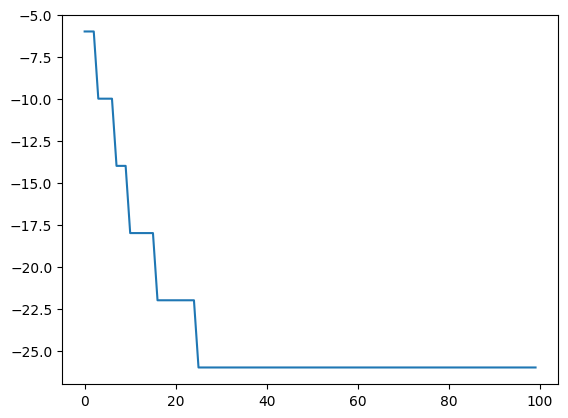

In [9]:
plt.plot(E_list)

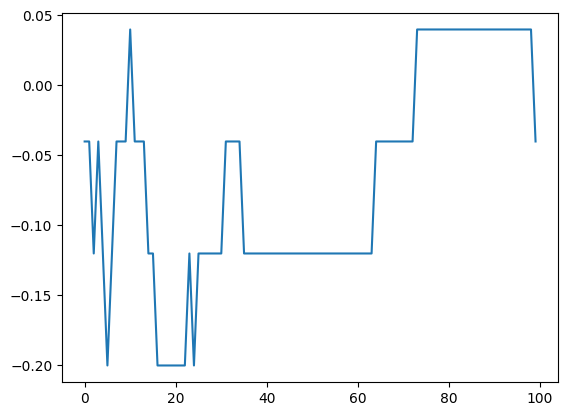

In [10]:
plt.plot(m_list)

In [11]:
L = 5
random_arr = np.random.randn(L*L)
mu = random_arr/abs(random_arr)

E_list = []
m_list = []

for i in range(100):
  random_index = np.random.randint(0, L*L)
  new = mu.copy()
  new[random_index] *= -1

  E_mu = E_total(mu)
  E_new = E_total(new)
  beta = 0

  if E_mu >= E_new:
    P = 1
  else:
    P = np.exp(beta * (E_mu - E_new))

  if np.random.random() < P:
    mu = new.copy()
  else:
    mu = mu.copy()

  m = np.sum(mu)/len(mu)
  E_list.append(E_total(mu))
  m_list.append(m)

print(E_list)
print(m_list)

[-2.0, 2.0, 6.0, 2.0, 2.0, 2.0, 2.0, 6.0, 6.0, 2.0, 6.0, 6.0, 6.0, 6.0, -2.0, 2.0, 6.0, 2.0, 2.0, 2.0, 2.0, 6.0, 2.0, 2.0, 6.0, 6.0, 6.0, 10.0, 10.0, 18.0, 10.0, 10.0, 10.0, 6.0, 2.0, -6.0, -14.0, -6.0, -10.0, -6.0, -6.0, -2.0, -2.0, 2.0, 6.0, 2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 10.0, 10.0, 14.0, 6.0, 6.0, 6.0, 2.0, 10.0, 6.0, 10.0, 18.0, 18.0, 10.0, 6.0, -2.0, -2.0, 2.0, -6.0, -14.0, -6.0, -6.0, -2.0, -10.0, -2.0, -2.0, -10.0, -14.0, -14.0, -14.0, -10.0, -6.0, -6.0, -6.0, -6.0, 2.0, -2.0, -6.0, -6.0, -10.0, -6.0, -6.0, -6.0, -2.0, -6.0, -6.0, -6.0, -10.0]
[0.12, 0.04, -0.04, 0.04, -0.04, 0.04, 0.12, 0.04, -0.04, 0.04, -0.04, 0.04, 0.12, 0.2, 0.28, 0.2, 0.28, 0.2, 0.28, 0.2, 0.28, 0.36, 0.44, 0.36, 0.28, 0.36, 0.28, 0.2, 0.12, 0.04, -0.04, -0.12, -0.2, -0.28, -0.36, -0.44, -0.52, -0.44, -0.52, -0.44, -0.36, -0.28, -0.36, -0.28, -0.2, -0.12, -0.2, -0.12, -0.04, 0.04, -0.04, 0.04, -0.04, 0.04, -0.04, 0.04, 0.12, 0.2, 0.12, 0.04, -0.04, 0.04, 0.12, 0.04, 0.12, 0.2, 0.28, 0.36, 0.28, 

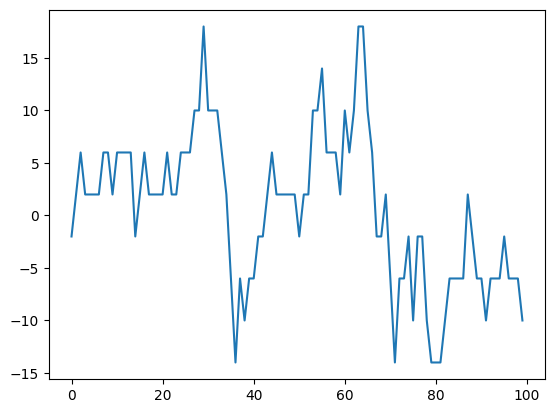

In [12]:
plt.plot(E_list)

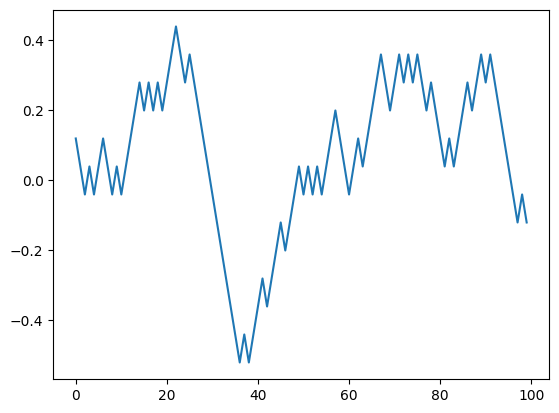

In [13]:
plt.plot(m_list)